In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [2]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()

In [3]:
# print description of dataset

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# add the target
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# make a list with the features we want to engineer

features = ['mean smoothness', 'mean compactness', 'mean concavity',
            'mean concave points', 'mean symmetry']

In [6]:
df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.11840,0.27760,0.3001,0.14710,0.2419
1,0.08474,0.07864,0.0869,0.07017,0.1812
2,0.10960,0.15990,0.1974,0.12790,0.2069
3,0.14250,0.28390,0.2414,0.10520,0.2597
4,0.10030,0.13280,0.1980,0.10430,0.1809


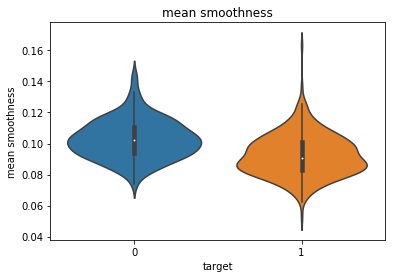

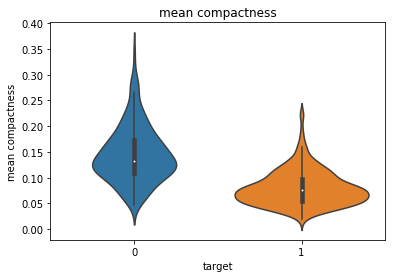

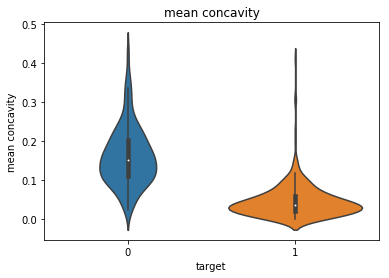

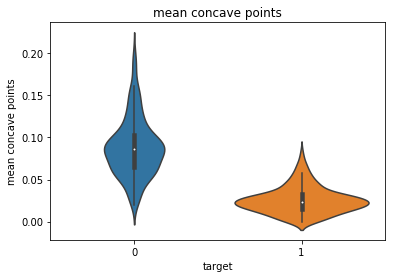

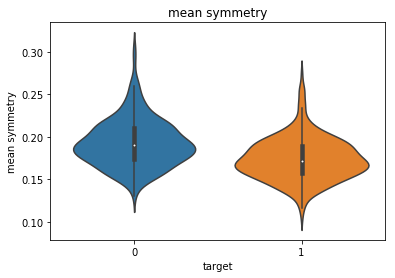

In [7]:
# make violin plots with the distribution of each feature

for f in features:
    sns.violinplot(x="target", y=f, data=df)
    plt.title(f)
    plt.show()

### Addition

In [8]:
# add the features

df['added_features'] = df[features].sum(axis=1)

df['added_features'].head()

0    1.08510
1    0.50165
2    0.80170
3    1.03270
4    0.71630
Name: added_features, dtype: float64

Text(0.5, 1.0, 'Added Features')

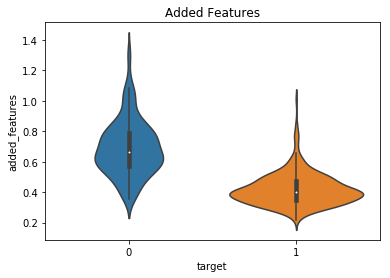

In [9]:
# violin plot with added features

sns.violinplot(x="target", y="added_features", data=df)

plt.title('Added Features')

### Product

In [10]:
# multiply the features

df['prod_features'] = df[features].prod(axis=1)

df['prod_features'].head()

0    0.000351
1    0.000007
2    0.000092
3    0.000267
4    0.000050
Name: prod_features, dtype: float64

Text(0.5, 1.0, 'Product of Features')

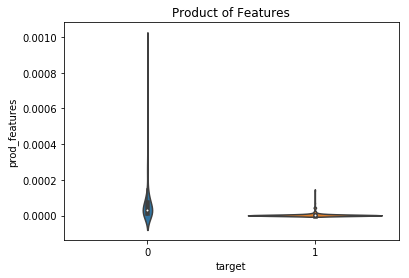

In [11]:
# violin plot with product of features

sns.violinplot(x="target", y="prod_features", data=df)

plt.title('Product of Features')

### Average

In [12]:
# mean of features

df['mean_features'] = df[features].mean(axis=1)

df['mean_features'].head()

0    0.21702
1    0.10033
2    0.16034
3    0.20654
4    0.14326
Name: mean_features, dtype: float64

Text(0.5, 1.0, 'Mean of Features')

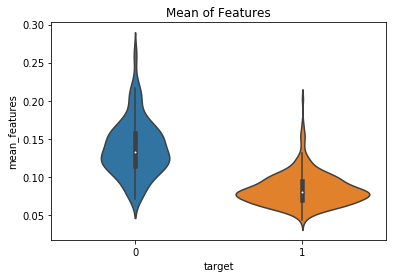

In [13]:
# violin plot with with of features

sns.violinplot(x="target", y="mean_features", data=df)

plt.title('Mean of Features')

### Standard deviation

In [14]:
# standard deviation of features

df['std_features'] = df[features].std(axis=1)

df['std_features'].head()

0    0.080321
1    0.045671
2    0.042333
3    0.078097
4    0.044402
Name: std_features, dtype: float64

Text(0.5, 1.0, 'Standard Deviation of Features')

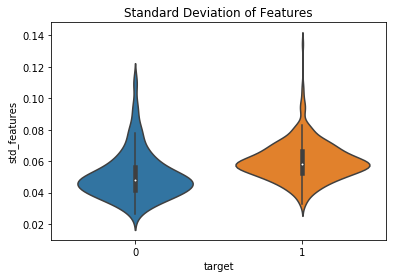

In [15]:
# violin plot with std of features

sns.violinplot(x="target", y="std_features", data=df)

plt.title('Standard Deviation of Features')

### Maximum

In [16]:
# maximum of features

df['max_features'] = df[features].max(axis=1)

df['max_features'].head()

0    0.3001
1    0.1812
2    0.2069
3    0.2839
4    0.1980
Name: max_features, dtype: float64

Text(0.5, 1.0, 'Maximum of Features')

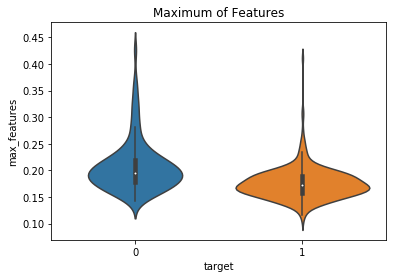

In [17]:
# violin plot with max of features

sns.violinplot(x="target", y="max_features", data=df)

plt.title('Maximum of Features')

### Minimum

In [18]:
# minimum of the features

df['min_features'] = df[features].min(axis=1)

df['min_features'].head()

0    0.11840
1    0.07017
2    0.10960
3    0.10520
4    0.10030
Name: min_features, dtype: float64

Text(0.5, 1.0, 'Minimum of Features')

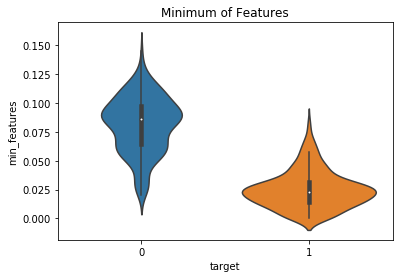

In [19]:
# violin plot with min of features

sns.violinplot(x="target", y="min_features", data=df)

plt.title('Minimum of Features')

In [24]:
# Perform all the operations in one line

df_t = df[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')
df_t.head()

,sum,prod,mean,std,max,min
0,1.08510,0.000351,0.21702,0.080321,0.3001,0.11840
1,0.50165,0.000007,0.10033,0.045671,0.1812,0.07017
2,0.80170,0.000092,0.16034,0.042333,0.2069,0.10960
3,1.03270,0.000267,0.20654,0.078097,0.2839,0.10520
4,0.71630,0.000050,0.14326,0.044402,0.1980,0.10030
